### Assignment 3: Loan Application Status Prediction

## Problem Statement

We are tasked with building separate machine learning models to predict the minimum and maximum air temperatures for the next day in Seoul, South Korea, based on various meteorological variables and forecast data provided in the dataset.

## Approach

We'll follow a standard machine learning workflow to tackle this problem:

1. **Data Exploration:** Explore the dataset to understand its structure, features, and distribution of the target variable.

2. **Data Preprocessing:** Preprocess the data to handle missing values, encode categorical variables, and scale numerical features.

3. **Using Label ENcoder for converting categorical to numerical:** Choose an appropriate machine learning algorithm for binary classification. We'll start with Logistic Regression.

4. **Model Selection and Evaluation:** Train the selected model on the preprocessed data. Evaluate the trained model's performance using metrics such as accuracy, precision, recall, F1-score, and ROC-AUC score.



## Data Exploration

In [11]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
data_url = "https://raw.githubusercontent.com/dsrscientist/Dataset2/main/temperature.csv"
df = pd.read_csv(data_url)



In [12]:
# Drop irrelevant columns like 'Date' for now
df.drop(columns=['Date'], inplace=True)

# Split features and target variables
X = df.drop(columns=['Next_Tmin', 'Next_Tmax'])
y_min = df['Next_Tmin']
y_max = df['Next_Tmax']

# Split the dataset into training and testing sets
X_train_min, X_test_min, y_train_min, y_test_min = train_test_split(X, y_min, test_size=0.2, random_state=42)
X_train_max, X_test_max, y_train_max, y_test_max = train_test_split(X, y_max, test_size=0.2, random_state=42)

# Standardize features
scaler = StandardScaler()
X_train_min_scaled = scaler.fit_transform(X_train_min)
X_test_min_scaled = scaler.transform(X_test_min)
X_train_max_scaled = scaler.fit_transform(X_train_max)
X_test_max_scaled = scaler.transform(X_test_max)

# Train Random Forest models
rf_min = RandomForestRegressor(n_estimators=100, random_state=42)
rf_min.fit(X_train_min_scaled, y_train_min)
rf_max = RandomForestRegressor(n_estimators=100, random_state=42)
rf_max.fit(X_train_max_scaled, y_train_max)

# Make predictions
y_pred_min = rf_min.predict(X_test_min_scaled)
y_pred_max = rf_max.predict(X_test_max_scaled)

# Evaluate models
mae_min = mean_absolute_error(y_test_min, y_pred_min)
mae_max = mean_absolute_error(y_test_max, y_pred_max)
mse_min = mean_squared_error(y_test_min, y_pred_min)
mse_max = mean_squared_error(y_test_max, y_pred_max)

print("Minimum Temperature:")
print("MAE:", mae_min)
print("MSE:", mse_min)
print("Maximum Temperature:")
print("MAE:", mae_max)
print("MSE:", mse_max)

ValueError: Input X contains NaN.
RandomForestRegressor does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values

## 2. Data Exploration

- 2.1 explore data table 
- 2.2 Conducted any necessary data cleaning steps.
- 2.3 Explore Target variable, Features, their distribution and Outliers
- 2.4 Correlation matrix and Heatmap
- 2.5 Split the data into features (X), target variable (y), training and testing sets for model evaluation.


### 2.1 Explore data table

In [4]:
# Print out the contents of the DataFrame to check its structure
print(df.head())


# Check the column names to ensure they match the expected column names
print(df.columns)


   station        Date  Present_Tmax  Present_Tmin  LDAPS_RHmin  LDAPS_RHmax  \
0      1.0  30-06-2013          28.7          21.4    58.255688    91.116364   
1      2.0  30-06-2013          31.9          21.6    52.263397    90.604721   
2      3.0  30-06-2013          31.6          23.3    48.690479    83.973587   
3      4.0  30-06-2013          32.0          23.4    58.239788    96.483688   
4      5.0  30-06-2013          31.4          21.9    56.174095    90.155128   

   LDAPS_Tmax_lapse  LDAPS_Tmin_lapse  LDAPS_WS    LDAPS_LH  ...  LDAPS_PPT2  \
0         28.074101         23.006936  6.818887   69.451805  ...         0.0   
1         29.850689         24.035009  5.691890   51.937448  ...         0.0   
2         30.091292         24.565633  6.138224   20.573050  ...         0.0   
3         29.704629         23.326177  5.650050   65.727144  ...         0.0   
4         29.113934         23.486480  5.735004  107.965535  ...         0.0   

   LDAPS_PPT3  LDAPS_PPT4      lat    

In [5]:
print(df.shape)

(7752, 25)


In [8]:
print(df.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7752 entries, 0 to 7751
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   station           7750 non-null   float64
 1   Date              7750 non-null   object 
 2   Present_Tmax      7682 non-null   float64
 3   Present_Tmin      7682 non-null   float64
 4   LDAPS_RHmin       7677 non-null   float64
 5   LDAPS_RHmax       7677 non-null   float64
 6   LDAPS_Tmax_lapse  7677 non-null   float64
 7   LDAPS_Tmin_lapse  7677 non-null   float64
 8   LDAPS_WS          7677 non-null   float64
 9   LDAPS_LH          7677 non-null   float64
 10  LDAPS_CC1         7677 non-null   float64
 11  LDAPS_CC2         7677 non-null   float64
 12  LDAPS_CC3         7677 non-null   float64
 13  LDAPS_CC4         7677 non-null   float64
 14  LDAPS_PPT1        7677 non-null   float64
 15  LDAPS_PPT2        7677 non-null   float64
 16  LDAPS_PPT3        7677 non-null   float64


In [9]:
# Compute summary statistics for temperature variables
temperature_variables = ['Present_Tmin', 'Present_Tmax', 'Next_Tmin', 'Next_Tmax']
summary_stats = df[temperature_variables].describe()
print("Summary Statistics for Temperature Variables:\n", summary_stats)


Summary Statistics for Temperature Variables:
        Present_Tmin  Present_Tmax    Next_Tmin    Next_Tmax
count   7682.000000   7682.000000  7725.000000  7725.000000
mean      23.225059     29.768211    22.932220    30.274887
std        2.413961      2.969999     2.487613     3.128010
min       11.300000     20.000000    11.300000    17.400000
25%       21.700000     27.800000    21.300000    28.200000
50%       23.400000     29.900000    23.100000    30.500000
75%       24.900000     32.000000    24.600000    32.600000
max       29.900000     37.600000    29.800000    38.900000


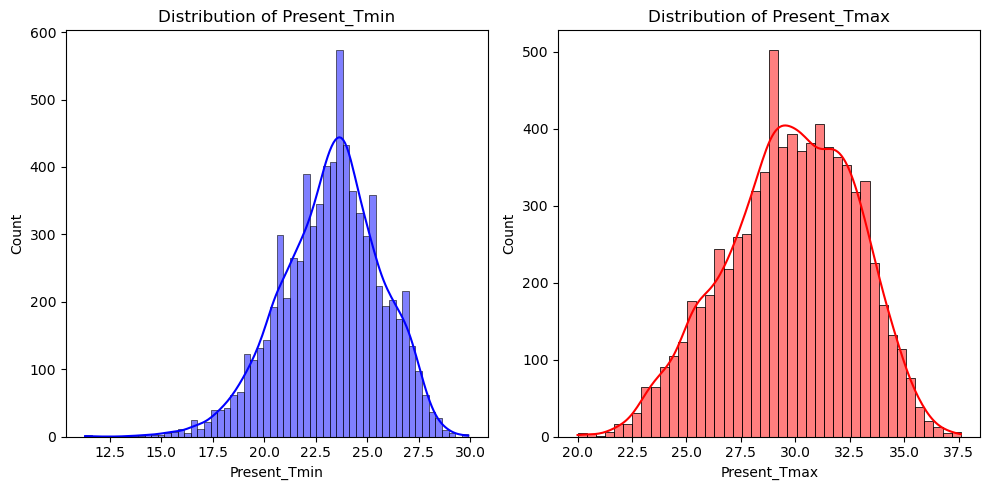

In [13]:
# Plot histograms for Present_Tmin and Present_Tmax
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
sns.histplot(df['Present_Tmin'], kde=True, color='blue')
plt.title('Distribution of Present_Tmin')

plt.subplot(1, 2, 2)
sns.histplot(df['Present_Tmax'], kde=True, color='red')
plt.title('Distribution of Present_Tmax')
plt.tight_layout()
plt.show()

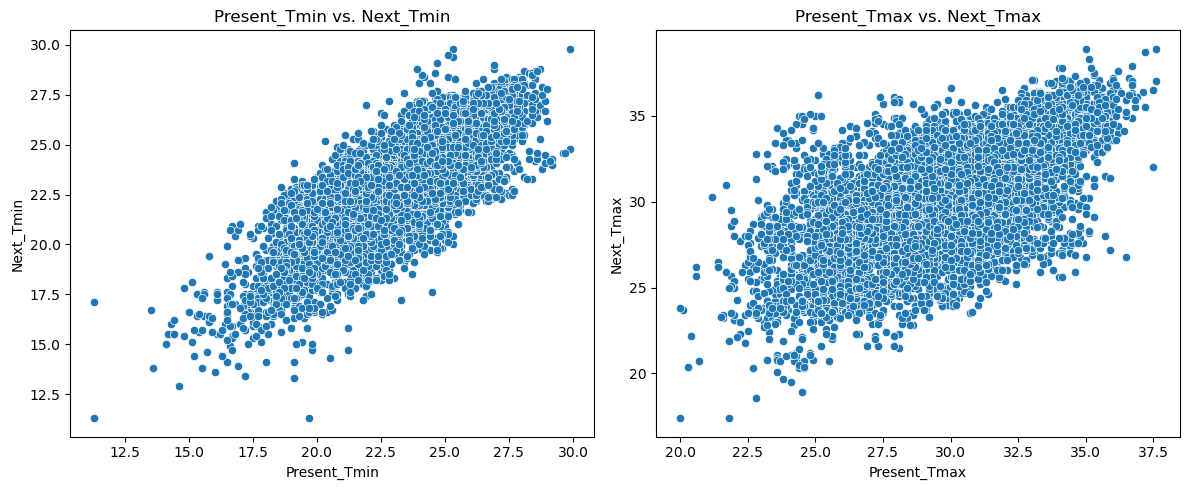

In [14]:
# Scatter plots for Present_Tmin/Next_Tmin and Present_Tmax/Next_Tmax
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.scatterplot(x='Present_Tmin', y='Next_Tmin', data=df)
plt.title('Present_Tmin vs. Next_Tmin')

plt.subplot(1, 2, 2)
sns.scatterplot(x='Present_Tmax', y='Next_Tmax', data=df)
plt.title('Present_Tmax vs. Next_Tmax')
plt.tight_layout()
plt.show()

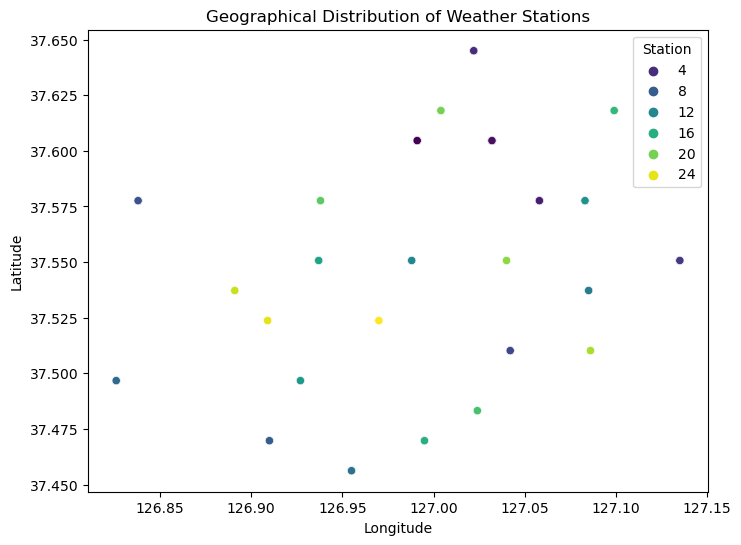

In [15]:
# Plot latitude and longitude coordinates of weather stations
plt.figure(figsize=(8, 6))
sns.scatterplot(x='lon', y='lat', data=df, hue='station', palette='viridis')
plt.title('Geographical Distribution of Weather Stations')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.legend(title='Station')
plt.show()

In [16]:
# Check for duplicate records
duplicate_rows = df[df.duplicated()]
print("Duplicate Rows:\n", duplicate_rows)

Duplicate Rows:
 Empty DataFrame
Columns: [station, Present_Tmax, Present_Tmin, LDAPS_RHmin, LDAPS_RHmax, LDAPS_Tmax_lapse, LDAPS_Tmin_lapse, LDAPS_WS, LDAPS_LH, LDAPS_CC1, LDAPS_CC2, LDAPS_CC3, LDAPS_CC4, LDAPS_PPT1, LDAPS_PPT2, LDAPS_PPT3, LDAPS_PPT4, lat, lon, DEM, Slope, Solar radiation, Next_Tmax, Next_Tmin]
Index: []

[0 rows x 24 columns]


### 2.2 Conducting any necessary data cleaning steps

In [17]:
# Check for missing values
missing_values = df.isnull().sum()
print("Missing Values:\n", missing_values)


Missing Values:
 station              2
Present_Tmax        70
Present_Tmin        70
LDAPS_RHmin         75
LDAPS_RHmax         75
LDAPS_Tmax_lapse    75
LDAPS_Tmin_lapse    75
LDAPS_WS            75
LDAPS_LH            75
LDAPS_CC1           75
LDAPS_CC2           75
LDAPS_CC3           75
LDAPS_CC4           75
LDAPS_PPT1          75
LDAPS_PPT2          75
LDAPS_PPT3          75
LDAPS_PPT4          75
lat                  0
lon                  0
DEM                  0
Slope                0
Solar radiation      0
Next_Tmax           27
Next_Tmin           27
dtype: int64


Since there are no missing values, nothing needs to be done
No categorical variables found in the dataset. No encoding needed.

In [29]:
df.shape

(7752, 24)

In [30]:
df.describe()

,station,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,LDAPS_CC1,...,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin
count,7750.000000,7682.000000,7682.000000,7677.000000,7677.000000,7677.000000,7677.000000,7677.000000,7677.000000,7677.000000,...,7677.000000,7677.000000,7677.000000,7752.000000,7752.000000,7752.000000,7752.000000,7752.000000,7725.000000,7725.000000
mean,13.000000,29.768211,23.225059,56.759372,88.374804,29.613447,23.512589,7.097875,62.505019,0.368774,...,0.485003,0.278200,0.269407,37.544722,126.991397,61.867972,1.257048,5341.502803,30.274887,22.932220
std,7.211568,2.969999,2.413961,14.668111,7.192004,2.947191,2.345347,2.183836,33.730589,0.262458,...,1.762807,1.161809,1.206214,0.050352,0.079435,54.279780,1.370444,429.158867,3.128010,2.487613
min,1.000000,20.000000,11.300000,19.794666,58.936283,17.624954,14.272646,2.882580,-13.603212,0.000000,...,0.000000,0.000000,0.000000,37.456200,126.826000,12.370000,0.098475,4329.520508,17.400000,11.300000
25%,7.000000,27.800000,21.700000,45.963543,84.222862,27.673499,22.089739,5.678705,37.266753,0.146654,...,0.000000,0.000000,0.000000,37.510200,126.937000,28.700000,0.271300,4999.018555,28.200000,21.300000
50%,13.000000,29.900000,23.400000,55.039024,89.793480,29.703426,23.760199,6.547470,56.865482,0.315697,...,0.000000,0.000000,0.000000,37.550700,126.995000,45.716000,0.618000,5436.345215,30.500000,23.100000
75%,19.000000,32.000000,24.900000,67.190056,93.743629,31.710450,25.152909,8.032276,84.223616,0.575489,...,0.018364,0.007896,0.000041,37.577600,127.042000,59.832400,1.767800,5728.316406,32.600000,24.600000
max,25.000000,37.600000,29.900000,98.524734,100.000153,38.542255,29.619342,21.857621,213.414006,0.967277,...,21.621661,15.841235,16.655469,37.645000,127.135000,212.335000,5.178230,5992.895996,38.900000,29.800000


In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7752 entries, 0 to 7751
Data columns (total 24 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   station           7750 non-null   float64
 1   Present_Tmax      7682 non-null   float64
 2   Present_Tmin      7682 non-null   float64
 3   LDAPS_RHmin       7677 non-null   float64
 4   LDAPS_RHmax       7677 non-null   float64
 5   LDAPS_Tmax_lapse  7677 non-null   float64
 6   LDAPS_Tmin_lapse  7677 non-null   float64
 7   LDAPS_WS          7677 non-null   float64
 8   LDAPS_LH          7677 non-null   float64
 9   LDAPS_CC1         7677 non-null   float64
 10  LDAPS_CC2         7677 non-null   float64
 11  LDAPS_CC3         7677 non-null   float64
 12  LDAPS_CC4         7677 non-null   float64
 13  LDAPS_PPT1        7677 non-null   float64
 14  LDAPS_PPT2        7677 non-null   float64
 15  LDAPS_PPT3        7677 non-null   float64
 16  LDAPS_PPT4        7677 non-null   float64


all columns are converted to numerical

### 2.4 Splitting into Test Data and Train Data

In [73]:
# Split features and target variables
X = df.drop(columns=['Next_Tmin', 'Next_Tmax'])
y_min = df['Next_Tmin']
y_max = df['Next_Tmax']


# Split the dataset into training and testing sets
X_train, X_test, y_train_max, y_test_max = train_test_split(X, y_max, test_size=0.2, random_state=42)
X_train, X_test, y_train_min, y_test_min = train_test_split(X, y_min, test_size=0.2, random_state=42)


In [74]:
# Standardize features
scaler = StandardScaler()
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [75]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor



In [80]:
# Step 3: Model Training
from sklearn.ensemble import RandomForestRegressor



# Define a dictionary to store models
models = {
    'Linear Regression': LinearRegression(),
    'Ridge': Ridge(),
    'Lasso': Lasso(),
    'Decision Tree': DecisionTreeRegressor(),
    'Random Forest': RandomForestRegressor(),
    'Gradient Boosting': GradientBoostingRegressor()
}



## 4. Model Evaluation and Selection


In [84]:
print("X_train_scaled shape:", X_train_scaled.shape)
print("y_train_max shape:", y_train_max.shape)

X_train_scaled shape: (6201, 22)
y_train_max shape: (6093,)


In [83]:
# Evaluate models using cross-validation
results_max = {}
results_min = {}

for name, model in models.items():
    # Cross-validate for Next_Tmax
    scores_max = cross_val_score(model, X_train_scaled, y_train_max, cv=5, scoring='neg_mean_squared_error')
    results_max[name] = -scores_max.mean()
    
    # Cross-validate for Next_Tmin
    scores_min = cross_val_score(model, X_train_scaled, y_train_min, cv=5, scoring='neg_mean_squared_error')
    results_min[name] = -scores_min.mean()



ValueError: Found input variables with inconsistent numbers of samples: [6201, 6093]